# Imports

In [156]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Content

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# EDA

In [157]:
df = pd.read_csv('creditcard.csv')
X = df[df.columns[0:-1]]
y = df['Class']
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [158]:
df.shape

(284807, 31)

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

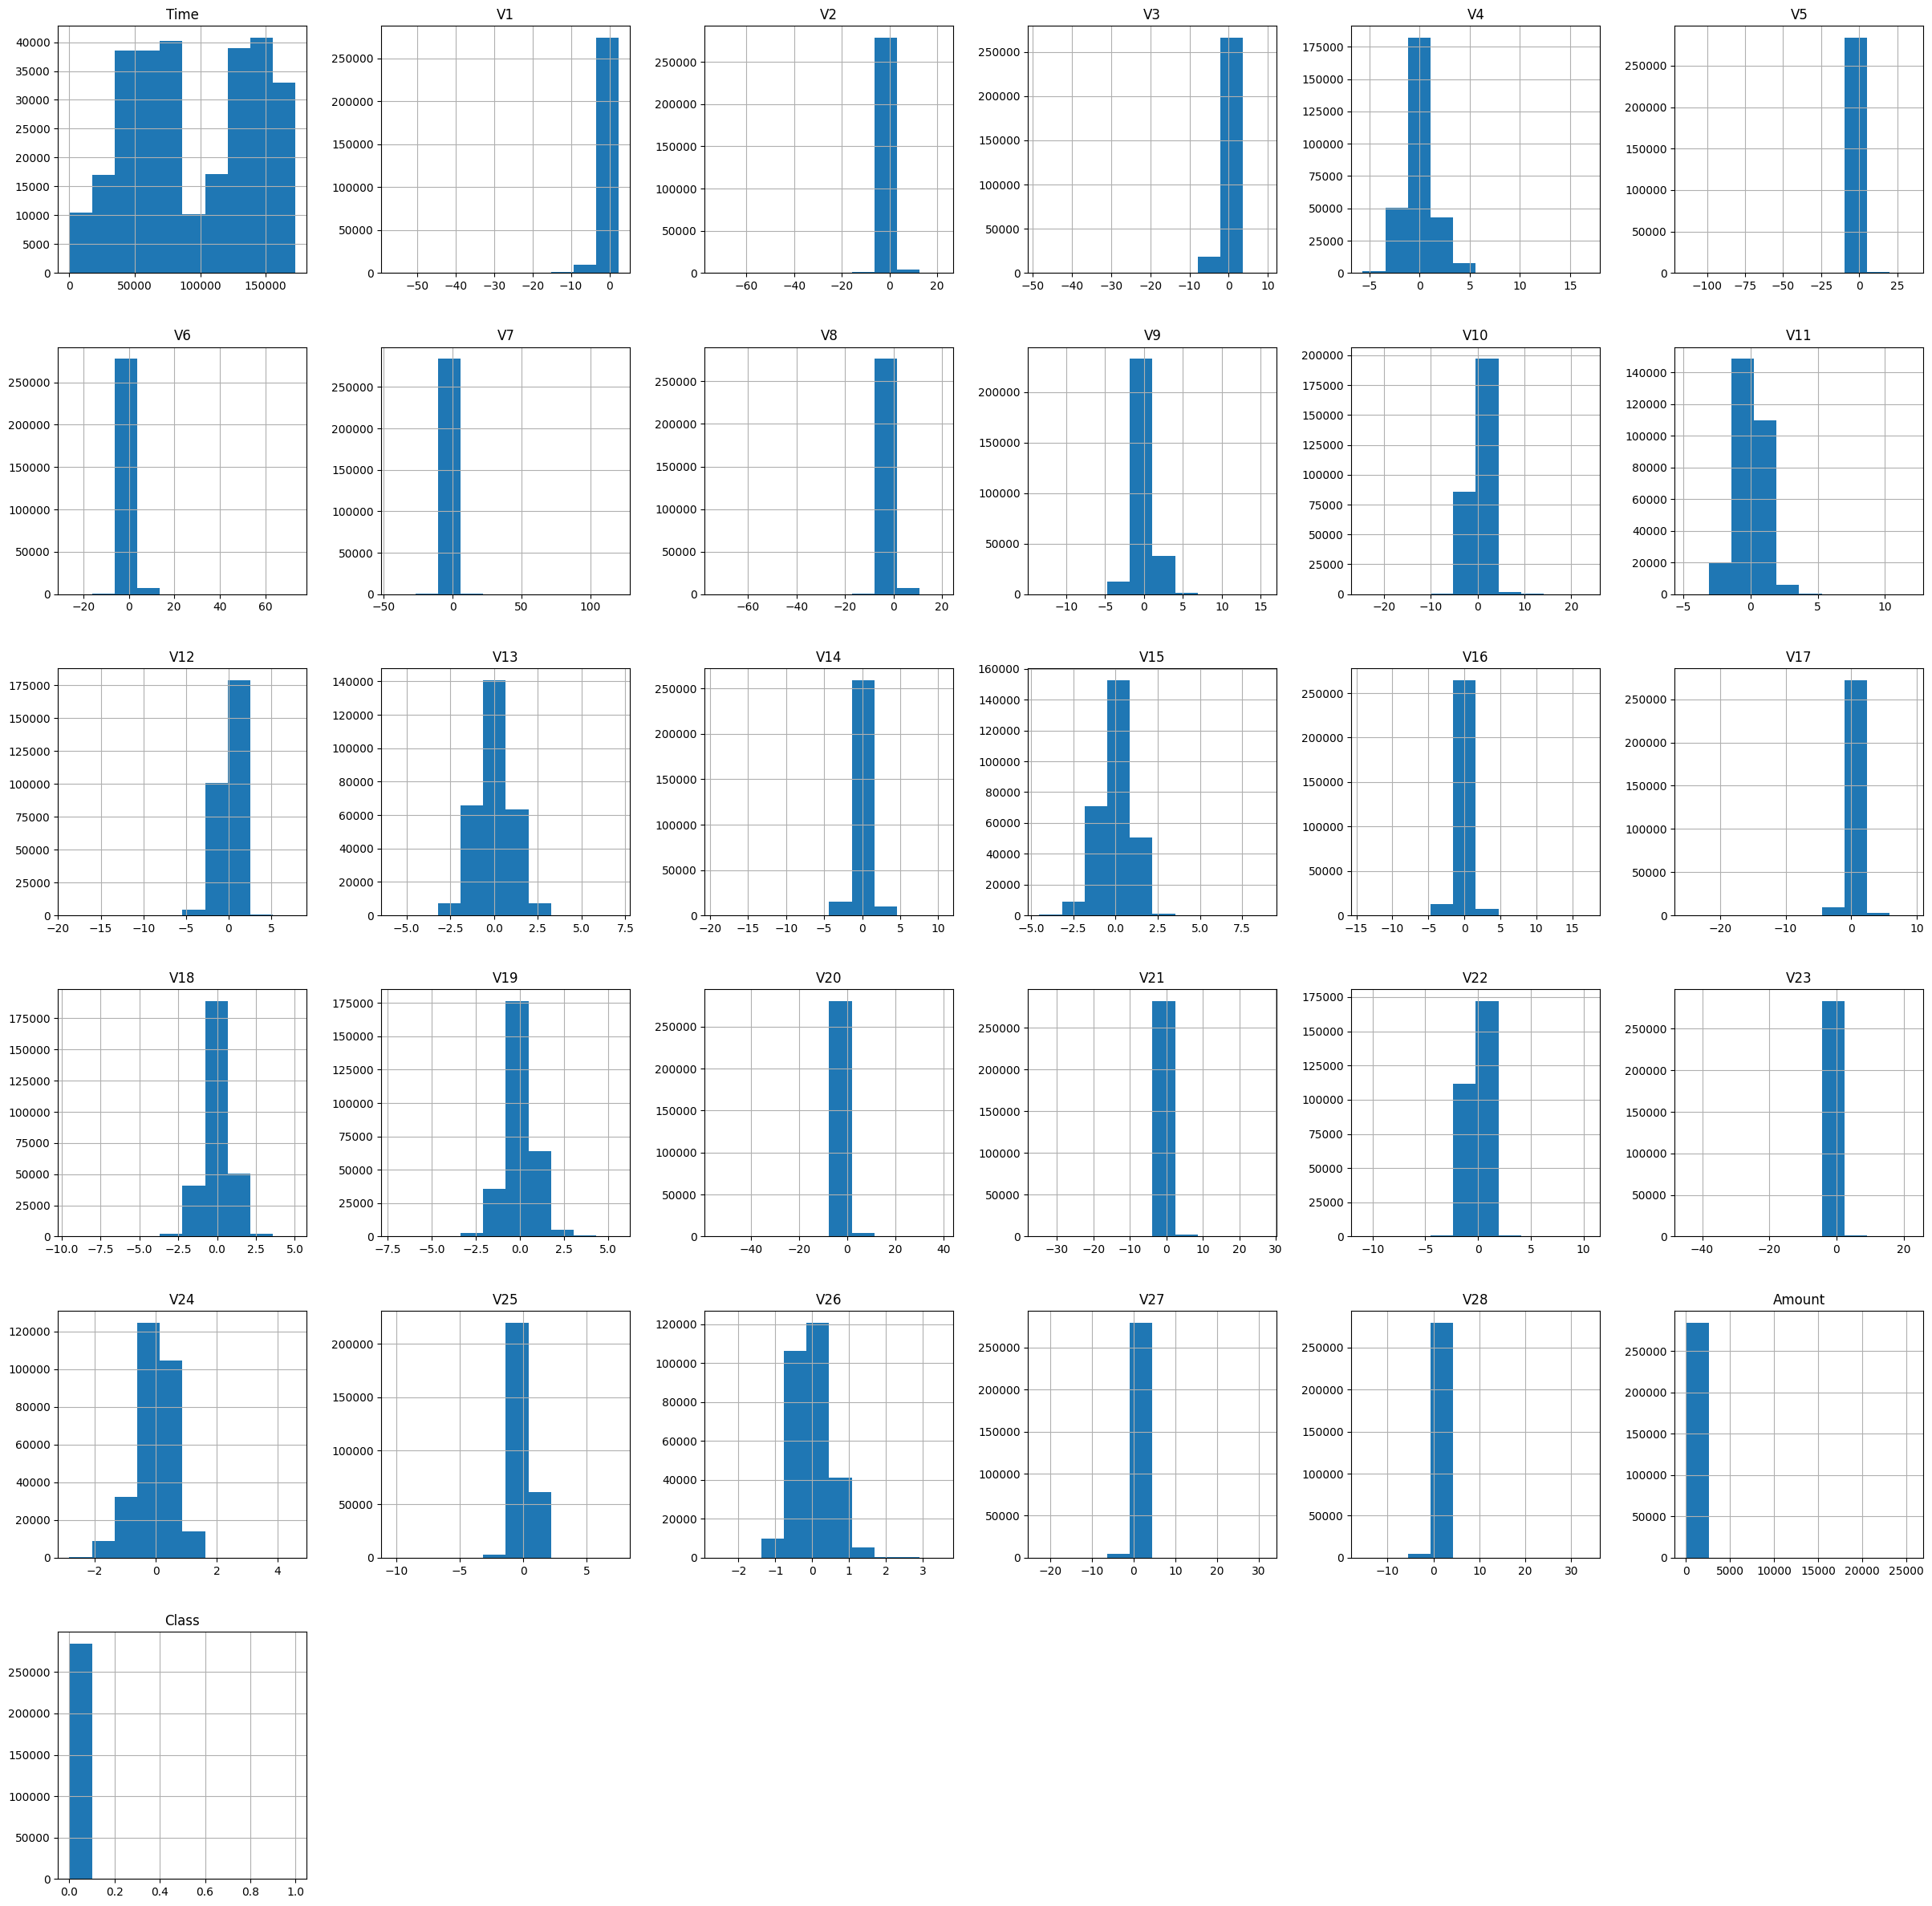

In [159]:
df.hist(figsize=(30,30))

In [160]:
# #pairplots
# df_sample = df.sample(10000)
# sns.pairplot(df_sample)
# plt.show()

## Target Count

In [161]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

classes are highly imbalanced. There are a lot less fraud transactions compared to non fraud transactions

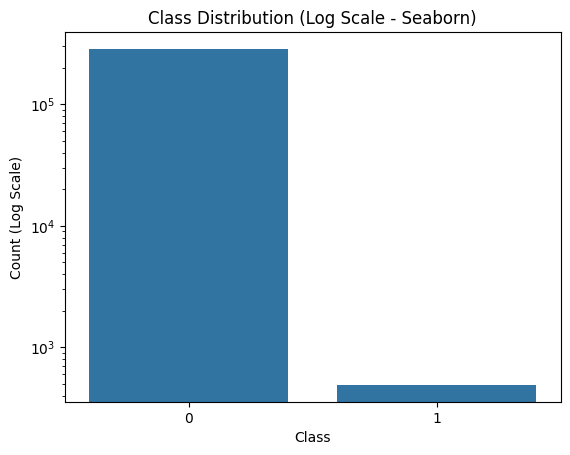

In [162]:
sns.countplot(x=y, data=df)
plt.yscale('log')
plt.title('Class Distribution (Log Scale - Seaborn)')
plt.xlabel('Class')
plt.ylabel('Count (Log Scale)')
plt.show()

# Model Training

## Hist Gradient Boosting

In [163]:
rng = np.random.RandomState(0) #reproducible tests
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=rng, stratify=y)

#create cross val
cv = StratifiedKFold(n_splits=5)

#create pipe
hist_pipeline = Pipeline([('scaler', StandardScaler()),
                         ('model', HistGradientBoostingClassifier(n_iter_no_change=10, random_state=rng))])

#params
max_iter = [375, 412, 430]
learning_rate = np.linspace(0.003, 0.007, num=5).tolist()
max_depth = [5, 6, 7]
param_grid = {'model__learning_rate':learning_rate,
               'model__max_iter':max_iter,
               'model__max_depth': max_depth}

hist_grid = GridSearchCV(estimator=hist_pipeline,param_grid=param_grid,cv=cv, scoring='f1', refit=True, n_jobs=-1)
hist_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        HistGradientBoostingClassifier(random_state=RandomState(MT19937) at 0x2030ECC0540))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.003, 0.004, 0.005, 0.006,
                                                  0.007],
                         'model__max_depth': [5, 6, 7],
                         'model__max_iter': [375, 412, 430]},
             scoring='f1')

## Metrics

In [172]:
# set best estimator to variable
hist_best_model = hist_grid.best_estimator_
hist_best_model


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 HistGradientBoostingClassifier(learning_rate=0.007,
                                                max_depth=6, max_iter=430,
                                                random_state=RandomState(MT19937) at 0x2043277BA40))])

In [165]:
print(hist_grid.best_params_)

{'model__learning_rate': 0.007, 'model__max_depth': 6, 'model__max_iter': 430}


In [166]:
hist_grid.best_score_

np.float64(0.8573542646745018)

### Class Report

In [ ]:
#classification report
hist_y_pred = hist_grid.predict(X_test)
hist_report = classification_report(y_test, hist_y_pred)
print(hist_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.73      0.82        98

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
#training predictions
hist_y_pred_train = hist_grid.predict(X_train)
hist_train_report = classification_report(y_train, hist_y_pred_train)
print(hist_train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.99      0.92      0.95       394

    accuracy                           1.00    227845
   macro avg       0.99      0.96      0.98    227845
weighted avg       1.00      1.00      1.00    227845



In [168]:
pd.DataFrame(hist_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,33.149427,0.354258,3.320014,0.367847,0.003,5,375,"{'model__learning_rate': 0.003, 'model__max_de...",0.802920,0.744186,0.838235,0.820144,0.830986,0.807294,0.033721,43
1,36.144498,1.251277,3.335462,0.228176,0.003,5,412,"{'model__learning_rate': 0.003, 'model__max_de...",0.836879,0.744186,0.838235,0.828571,0.830986,0.815772,0.035972,42
2,37.571636,1.392764,3.463638,0.252696,0.003,5,430,"{'model__learning_rate': 0.003, 'model__max_de...",0.845070,0.744186,0.838235,0.828571,0.830986,0.817410,0.037066,41
3,37.726101,0.543211,3.159284,0.146151,0.003,6,375,"{'model__learning_rate': 0.003, 'model__max_de...",0.781955,0.744186,0.838235,0.845070,0.814286,0.804746,0.037485,45
4,39.578873,1.029029,3.894831,0.149581,0.003,6,412,"{'model__learning_rate': 0.003, 'model__max_de...",0.828571,0.744186,0.846715,0.839161,0.830986,0.817924,0.037420,40
5,39.131273,1.150449,3.665121,0.146197,0.003,6,430,"{'model__learning_rate': 0.003, 'model__max_de...",0.845070,0.744186,0.846715,0.847222,0.830986,0.822836,0.039778,36
6,36.801932,0.470367,3.172187,0.162563,0.003,7,375,"{'model__learning_rate': 0.003, 'model__max_de...",0.800000,0.734375,0.838235,0.847222,0.811594,0.806285,0.039838,44
7,39.644055,1.579465,3.692330,0.219223,0.003,7,412,"{'model__learning_rate': 0.003, 'model__max_de...",0.808824,0.744186,0.855072,0.855172,0.830986,0.818848,0.041119,39
8,40.296399,1.068616,3.769211,0.274356,0.003,7,430,"{'model__learning_rate': 0.003, 'model__max_de...",0.834532,0.744186,0.855072,0.855172,0.825175,0.822828,0.041019,37
9,30.919815,2.054128,3.313277,0.282510,0.004,5,375,"{'model__learning_rate': 0.004, 'model__max_de...",0.861111,0.744186,0.846715,0.839161,0.827586,0.823752,0.041245,35


# Retrain Model

I would like to retrain the model because:
- I did not tune different L2 regularization parameters
- I would like to teset L2 reg params, because I suspect model may be overfit due to high difference between train pred and test pred

In [ ]:
hist_l2_pipeline = Pipeline([('scaler', StandardScaler()),
                         ('model', HistGradientBoostingClassifier(learning_rate=0.007, max_depth=6, max_iter=430,
                               random_state=rng))])

param_grid = {'model__l2_regularization': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0]}

grid = GridSearchCV(hist_l2_pipeline, param_grid, cv=cv, scoring='f1', refit=True, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        HistGradientBoostingClassifier(learning_rate=0.007,
                                                                       max_depth=6,
                                                                       max_iter=430,
                                                                       random_state=RandomState(MT19937) at 0x2030ECC0540))]),
             n_jobs=-1,
             param_grid={'model__l2_regularization': [0.01, 0.1, 0.5, 1.0, 2.0,
                                                      5.0, 10.0, 20.0]},
             scoring='f1')

In [176]:
grid.best_params_

{'model__l2_regularization': 0.01}

In [177]:
grid.best_score_

np.float64(0.8570067524517496)

In [178]:
grid.best_index_

np.int64(0)

### Class Report

In [181]:
y_pred = grid.predict(X_test)
l2_class_report = classification_report(y_test, y_pred)
print(l2_class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.73      0.82        98

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



# Combine L2 train with full param grid

only training l2 did not get better results, going to attempt to train with full param grid from the first model training

In [182]:
#create pipe
hist_pipeline = Pipeline([('scaler', StandardScaler()),
                         ('model', HistGradientBoostingClassifier(n_iter_no_change=10, random_state=rng))])

#params
max_iter = [375, 412, 430]
learning_rate = np.linspace(0.003, 0.007, num=5).tolist()
max_depth = [5, 6, 7]
param_grid = {'model__learning_rate':learning_rate,
               'model__max_iter':max_iter,
               'model__max_depth': max_depth,
               'model__l2_regularization': [0.01,0.03,0.05,0.07,]}

grid = GridSearchCV(estimator=hist_pipeline,param_grid=param_grid,cv=cv, scoring='f1', refit=True, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        HistGradientBoostingClassifier(random_state=RandomState(MT19937) at 0x2030ECC0540))]),
             n_jobs=-1,
             param_grid={'model__l2_regularization': [0.01, 0.03, 0.05, 0.07],
                         'model__learning_rate': [0.003, 0.004, 0.005, 0.006,
                                                  0.007],
                         'model__max_depth': [5, 6, 7],
                         'model__max_iter': [375, 412, 430]},
             scoring='f1')

### Class Report

In [183]:
y_pred = grid.predict(X_test)
l2_class_report = classification_report(y_test, y_pred)
print(l2_class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.74      0.83        98

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

